Logistic Regression Analysis

By: Ryan

In this brief assessment, I will be looking at the Titanic Dataset which contains various information features about members aboard the famous ship such as age, ticket price, and gender among others. Through the use of classification, I will determine the probability of whether or not each of those members survived that night or not. I will be using Logistic Regression to perform this, and focusing just on the hyperparameter "C" that controls the penalizing of the coefficients of our regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RepeatedKFold
from sklearn import metrics 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import make_scorer, recall_score, precision_score

Data = pd.read_csv('/Users/RyanReiff/Documents/Machine_Learning_Datasets/titanic.csv', header=None)

Column_Header = Data.iloc[0] 
Data = Data[1:] 
Data.columns = Column_Header


Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.25,NaN,2
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,0
3,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.925,NaN,2
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1,C123,2
5,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.05,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
708,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39,0,5,382652,29.125,NaN,1
709,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13,NaN,2
710,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30,B42,2
711,890,1,1,"Behr, Mr. Karl Howell",1,26,0,0,111369,30,C148,0


Understanding the Dataset:
    
    PassengerID : Numerical count of the instance of that individual passenger
    Survived: 1=Yes 0=No
    Pclass: The class of the ticket, 1=First, 2=Second, 3=Third
    Name: The persons name
    Sex: 1=Male, 0=Female
    Age: How many years the person has been alive
    SibSp: The number of siblings/spouses this person had aboard the Titanic
    Parch: The number of parents/children aboard the Titanic
    Ticket: The ticket number
    Fare: The price of the ticket
    Cabin: The cabin number
    Embarked: Which port the person embarked out of, 0=C=Cherbourg, 1=Q=Queenstown, 2=S=Southampton

Now I put a random 10% of the data aside to test my model on later down the road. This step is shown below. What is seen below is the random remaining 90% of my dataset.

In [2]:
Test_Dataset = Data.sample(frac=0.1, random_state=13)
Training_Validation_Dataset = Data.drop(Test_Dataset.index)

Data = Training_Validation_Dataset
Data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,0
3,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.925,NaN,2
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1,C123,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54,0,0,17463,51.8625,E46,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2,3,1,349909,21.075,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
707,885,0,3,"Sutehall, Mr. Henry Jr",1,25,0,0,SOTON/OQ 392076,7.05,NaN,2
708,886,0,3,"Rice, Mrs. William (Margaret Norton)",0,39,0,5,382652,29.125,NaN,1
709,887,0,2,"Montvila, Rev. Juozas",1,27,0,0,211536,13,NaN,2
710,888,1,1,"Graham, Miss. Margaret Edith",0,19,0,0,112053,30,B42,2


Some Early Visualization of the Data

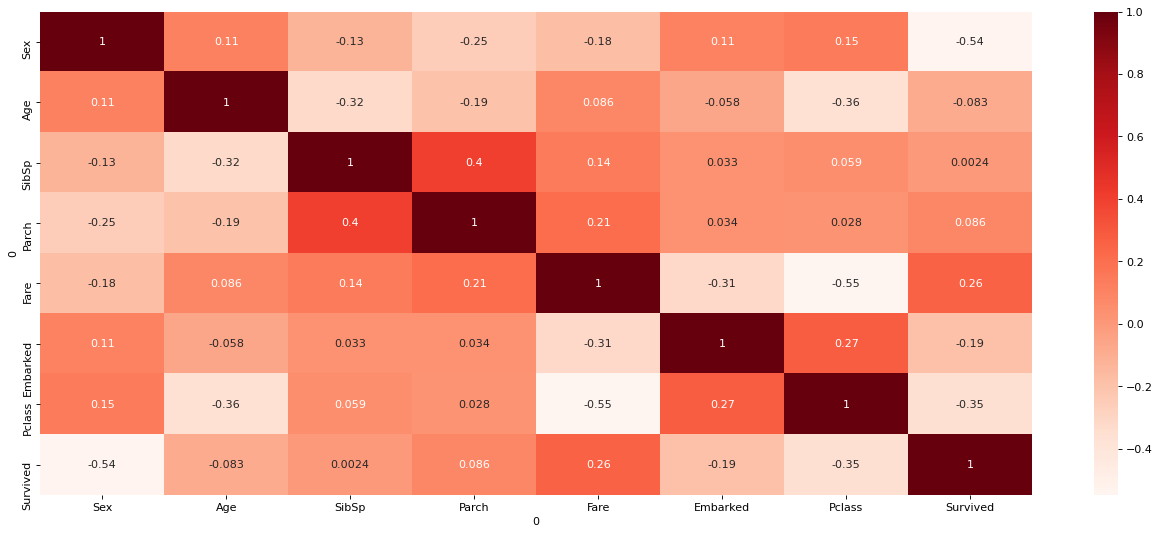

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(20, 8), dpi=80, facecolor='w', edgecolor='k')

Data_vis = Data[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Pclass','Survived']]

Data_vis = Data_vis.astype(float)
corr = Data_vis.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

Hyperparameter Tuning:

    Now I will tune the single hyperparameter 'C' below. This hyperparameter controls how much we penalize the coefficients that are attached to the variables of our linear equation (this linear equation exists as an exponent of Euler's constant in the denominator of our logistic function). 'C' can be defined as 1/alpha, and the penalty term can be defined as (alpha/2)* L2Norm(weights)^2. Therefore, by increasing our penalty term alpha, we decrease the value of C. So we try various values for 'C' and determine at which point our training and testing datasets are best balanced, where our model avoids overfitting and is generalized enough.
    
    I will also be using precision as the metric here as opposed to accuracy or recall. This allows the model to best fit in a way that accounts for the fewest number of false positives, in this case the fewest predictions of those that survived, but in reality actually perished.

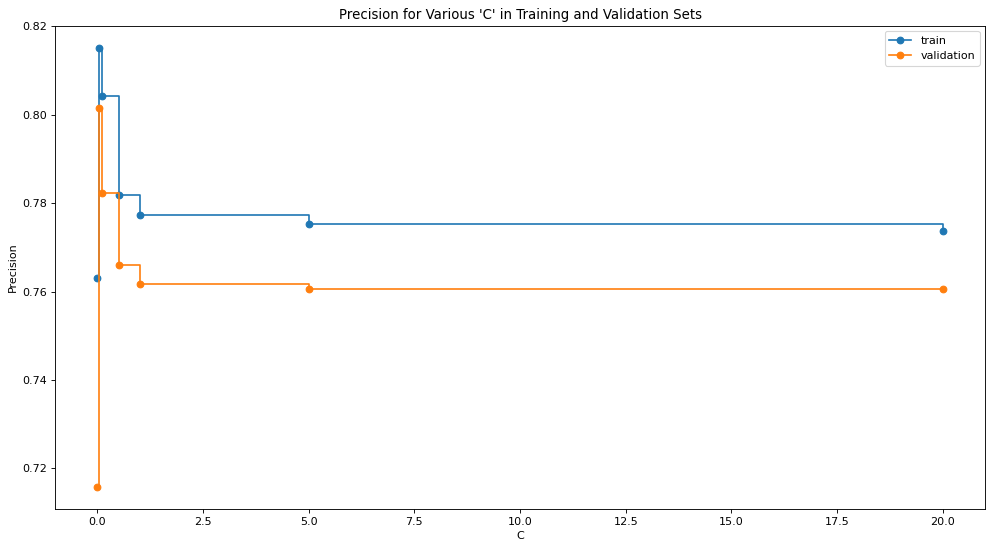

In [4]:
X = Data[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Pclass']]
y = Data[['Survived']]
y = y.values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, 
                         fit_intercept=True, intercept_scaling=1, class_weight=None, 
                         random_state=13, solver='lbfgs', max_iter=1000, multi_class='auto', 
                         verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

parameter_range = [0.000001,0.05,0.1,0.5,1,5,20]
  
cv = RepeatedKFold(n_splits=4, n_repeats=5, random_state=13)

train_score, test_score = validation_curve(clf, X, y, 
                         param_name = "C", 
                         param_range = parameter_range, 
                         cv = cv, scoring = make_scorer(precision_score, pos_label='1')) 

mean_train_score = np.mean(train_score, axis = 1) 
mean_test_score = np.mean(test_score, axis = 1) 
  
    
fig, ax = plt.subplots(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
ax.set_xlabel("C")
ax.set_ylabel("Precision")
ax.set_title("Precision for Various 'C' in Training and Validation Sets")
ax.plot(parameter_range, mean_train_score, marker='o', label="train", drawstyle="steps-post")
ax.plot(parameter_range, mean_test_score, marker='o', label="validation", drawstyle="steps-post")
ax.legend()
plt.show()


Analysis:

    Cross Validation shows that the precision is best when C=0.05 roughly. This means that alpha is 20. We can see above that adding a penalty term to generalize the model even improves the performance of the training data as well as the testing data, and this is because we are measuring precision here and not MLE. So while penalty terms (increasing alpha) will decrease the value of the MLE for our training set (which is best maximized when alpha=0 'overfitting'), they can actually improve other scoring metrics like precision, even on training data.

RESULTS

In [5]:
X_Test_Dataset = Test_Dataset[['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Pclass']]
y_Test_Dataset = Test_Dataset[['Survived']]


clf = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=0.05, 
                         fit_intercept=True, intercept_scaling=1, class_weight=None, 
                         random_state=13, solver='lbfgs', max_iter=1000, multi_class='auto', 
                         verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

clf.fit(X,y)

y_pred = clf.predict(X_Test_Dataset)

print("Precision When Comparing Predictions to Unseen Test Data:",
      metrics.precision_score(y_Test_Dataset,y_pred, pos_label = '1'))

Precision When Comparing Predictions to Unseen Test Data: 0.896551724137931


Analysis:
    
    We achieved an 89% precision score for our model which is presumably very nice. However, we must now compare this value to a baseline value in order to determine just how impressive of a score it actually is. We can do this by using a dummy classifier, and seeing how much better our logistic regression performs as opposed to random guessing or using a constant value.

Confusion Matrix:

Text(0.5, 15.0, 'Predicted label')

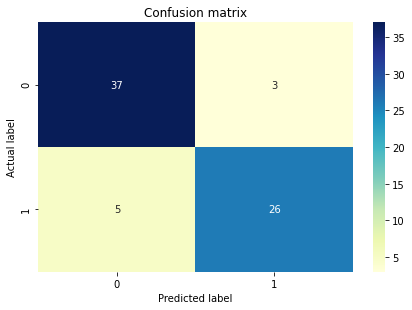

In [6]:
cnf_matrix = metrics.confusion_matrix(y_Test_Dataset, y_pred)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Confusion Matrix Analysis:

    By doing a brief analysis of our confusion matrix, we can see that the model does a pretty good job of classifying the passangers of the Titanic. There are only three instances of the model producing a false positive, and five instances of a false negative. 

How Precise is the classifier compared to randomness or consistent guessing?

First, we look at how precise our classification would be if we chose to just guess that everyone survided the Titanic. By assuming values of '1' for everyone, we can observe how improved our precision score is from our Logistic Regression relative to what it would have been had we guessed.

In [7]:
dummy_clf = DummyClassifier(strategy="constant", constant='1')
dummy_clf.fit(X, y)
pred = dummy_clf.predict(X_Test_Dataset)
print(' Precision Score if we Assume Survival for all\n\n', 
      metrics.precision_score(y_Test_Dataset, pred, pos_label='1'))

 Precision Score if we Assume Survival for all

 0.43661971830985913


Now we can look at how precise our classfication would be if we picked at random (flipped a coin) whether or not a given individual survived the Titanic.

In [8]:
dummy_clf = DummyClassifier(strategy="uniform", random_state = 13)
dummy_clf.fit(X, y)
pred = dummy_clf.predict(X_Test_Dataset)
print(' Precision Score if we Randomly Guess\n Survival Chances for all\n\n', 
      metrics.precision_score(y_Test_Dataset, pred, pos_label='1'))

 Precision Score if we Randomly Guess
 Survival Chances for all

 0.45454545454545453


Analysis:
    
    We can see that by guessing randomly and assigning constant values, we achieve very poor results from our classifier. In reference to the scores of 0.43 and 0.45 above, when compared to the 0.89 precision score we achieved earlier, we can conclude the Logistic Regression does a fantastic job of classifying the passenger's survival outcomes. We are basically doubling our precision by using Logistic Regression.

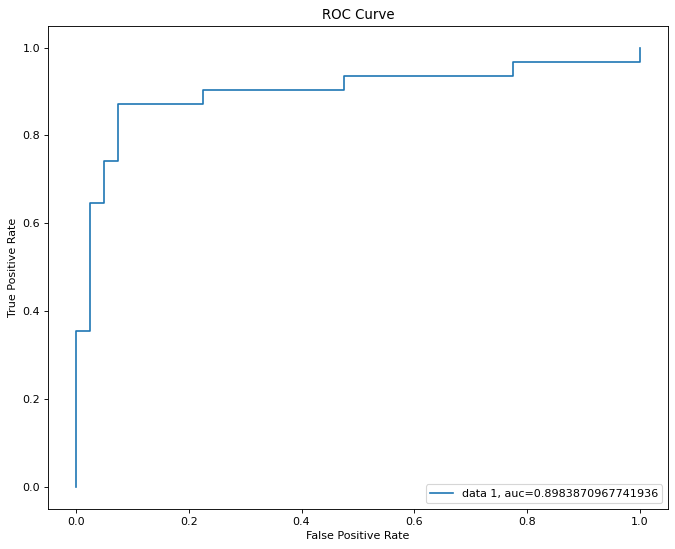

In [9]:
y_pred_proba = clf.predict_proba(X_Test_Dataset)[::,1]
y_new = y_Test_Dataset.values
y_new = y_new.ravel()

fpr, tpr, _ = metrics.roc_curve(y_Test_Dataset,  y_pred_proba, pos_label = '1')
auc = metrics.roc_auc_score(y_Test_Dataset, y_pred_proba)

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

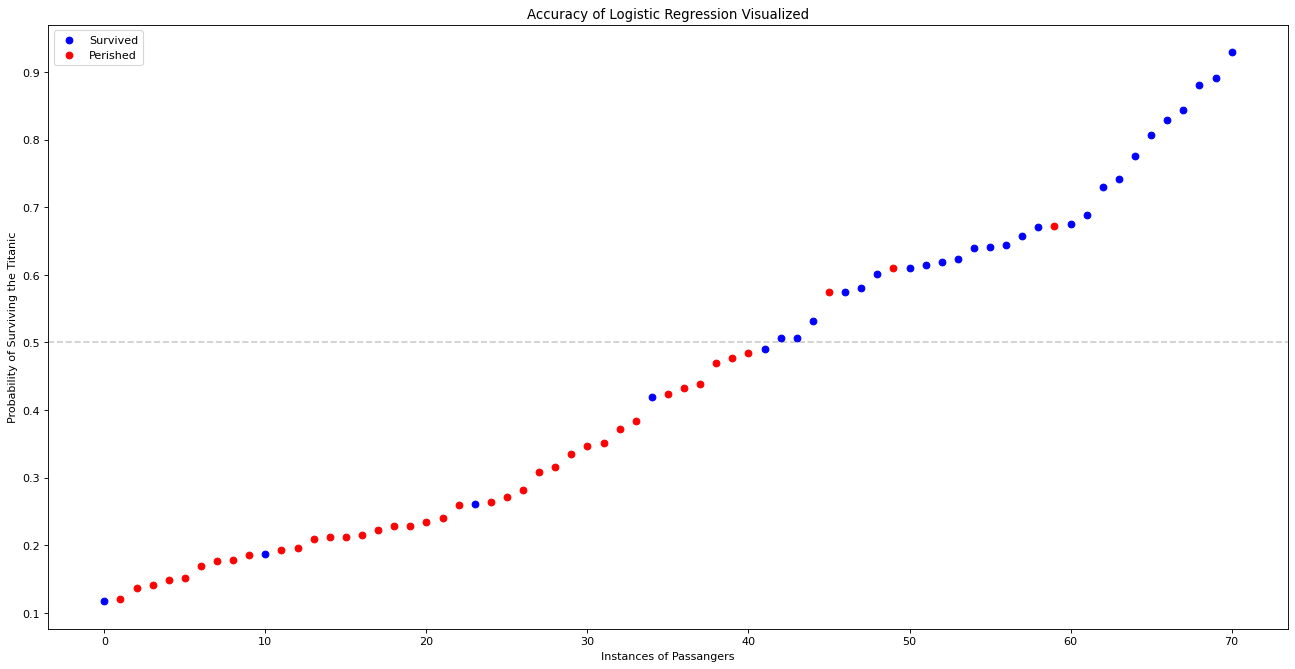

In [10]:
y = clf.predict_proba(X_Test_Dataset)[:,1]
y = np.array(y)

y_new = y_Test_Dataset.values
y_new = y_new.ravel()


df_master = pd.DataFrame({'Probabilities':y, 'Survived?':y_new})
df_master

df_master = df_master.sort_values(['Probabilities'], ascending=[True])
df_master['Count'] = np.arange(0,71)

Survival_DF = df_master.loc[df_master['Survived?'] == '1']
Perished_DF = df_master.loc[df_master['Survived?'] == '0']


Survival = Survival_DF['Probabilities'].values
Perished = Perished_DF['Probabilities'].values

x1 = Survival_DF['Count'].values
x2 = Perished_DF['Count'].values

plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(x1,Survival,c='blue', label='Survived')
plt.scatter(x2,Perished,c='red', label='Perished')
plt.axhline(y=0.5, color='black', linestyle='--', alpha = 0.2)
plt.ylabel('Probability of Surviving the Titanic')
plt.xlabel('Instances of Passangers')
plt.title('Accuracy of Logistic Regression Visualized')
plt.legend()
plt.show()


Analysis:
    
    As we can see, the model does a very nice job. The precision of our Test Set was 89%, and when we visualize our predictions, we can see that we do a very good job of minimizing false positives. In this case, we only have predicted three people to live who actually perished.

Some Deeper Analysis

In [11]:
def Analysis_Deeper():
    
    New_Analysis1 = Test_Dataset[['Survived']]
    New_Analysis2 = Test_Dataset[['Sex']]
    New_Analysis3 = Test_Dataset[['Age']]
    New_Analysis4 = Test_Dataset[['Name']]
    New_Analysis5 = Test_Dataset[['Fare']]
    New_Analysis6 = Test_Dataset[['Parch']]
    New_Analysis7 = Test_Dataset[['SibSp']]
    New_Analysis8 = Test_Dataset[['Pclass']]


    y = clf.predict_proba(X_Test_Dataset)[:,1]
    y = np.array(y)

    New_Analysis1 = New_Analysis1.values
    New_Analysis1 = New_Analysis1.ravel()

    New_Analysis2 = New_Analysis2.values
    New_Analysis2 = New_Analysis2.ravel()

    New_Analysis3 = New_Analysis3.values
    New_Analysis3 = New_Analysis3.ravel()

    New_Analysis4 = New_Analysis4.values
    New_Analysis4 = New_Analysis4.ravel()

    New_Analysis5 = New_Analysis5.values
    New_Analysis5 = New_Analysis5.ravel()

    New_Analysis6 = New_Analysis6.values
    New_Analysis6 = New_Analysis6.ravel()

    New_Analysis7 = New_Analysis7.values
    New_Analysis7 = New_Analysis7.ravel()

    New_Analysis8 = New_Analysis8.values
    New_Analysis8 = New_Analysis8.ravel()



    df_master = pd.DataFrame({'Probabilities':y, 'Survived?':New_Analysis1, 
                              'Sex':New_Analysis2, 'Age':New_Analysis3, 'Name':New_Analysis4,
                             'Fare':New_Analysis5, 'Parch':New_Analysis6, 'SibSp':New_Analysis7,
                             'Pclass':New_Analysis8})
    return(df_master)

Analysis_Deeper()


df_master_fp = Analysis_Deeper().loc[Analysis_Deeper()['Probabilities'] > 0.5]
df_master_fp = df_master_fp.loc[df_master_fp['Survived?'] == '0']

print('A list of our False Positive Instances')

df_master_fp

A list of our False Positive Instances


,Probabilities,Survived?,Sex,Age,Name,Fare,Parch,SibSp,Pclass
30,0.671494,0,0,24,"Yrois, Miss. Henriette (""Mrs Harbeck"")",13,0,0,2
31,0.609263,0,0,14.5,"Zabour, Miss. Hileni",14.4542,0,1,3
60,0.573851,0,1,30,"Foreman, Mr. Benjamin Laventall",27.75,0,0,1


In [12]:
df_master_fn = Analysis_Deeper().loc[Analysis_Deeper()['Probabilities'] < 0.5]
df_master_fn = df_master_fn.loc[df_master_fn['Survived?'] == '1']

print('A list of our False Negative Instances')

df_master_fn

A list of our False Negative Instances


,Probabilities,Survived?,Sex,Age,Name,Fare,Parch,SibSp,Pclass
35,0.489772,1,1,27,"Chambers, Mr. Norman Campbell",53.1,0,1,1
40,0.419276,1,1,0.42,"Thomas, Master. Assad Alexander",8.5167,1,0,3
50,0.186735,1,1,20,"Lindqvist, Mr. Eino William",7.925,0,1,3
64,0.117002,1,1,44,"Sundman, Mr. Johan Julian",7.925,0,0,3
67,0.261391,1,1,32,"Beane, Mr. Edward",26,0,1,2


Interesting Discussion:
    
    Here I would like to discuss the two most incorrectly labeled individuals in the test set, these being Johan Sundman (falsely predicted to have perished in the accident, given a 12% chance of survival) and Yrois, Miss. Henriette ("Mrs Harbeck") (falsely predicted to have survived the accident, given a 67% chance of survival). I decided to look into the story of these individuals, to understand how the model messed up.
    
    First, starting with Mrs. Harbeck, since she is a woman, who is very young (and since woman and children were given boats first) the model made the likely assumption that she survived. However, Miss Yrois was also a second class passenger, which could have made it more difficult to get above deck. She was also on board with an American cinemotographer, who she was presumed to be romantically involved with, and it is possible that their relationship lead her to stay on the boat longer than she should have either to look for him, or to get a boat together with him. I mention this here since according to the manifest data, she had no siblings or parents or partner or children of any kind on board (SibSp & Parch both being zero). The model had these data values as zero, since the manifest listed it as that, and it made the incorrect assumption that she had a high likelihood to survive (as those with family had a tougher time finding their loved ones and getting everyone together). Upon further investigation it appears she did infact have a romantic partner aboard (the American), and this could have been the reason behind the model's incorrect prediction. Her SibSp value changed while she was onboard the ship, and the model got its data from before she boarded.
    
    Second, Johan Sudman. He was predicted to have perished mainly due to him being a man, in a 3rd class cabin, and being middle aged (since again women and children were given boats first along with the wealthy). However, according to Sudman's accounts, he was able to fight through the crowd of people to the upper deck where the rowboats were being launched, and as one was being lowered to the sea, he decided to jump off the ship and onto it as it had already begun descending down the side of the ship. Sudman claims that there were no women or children in sight at the time of this or he would have let them board before himself, and claims that this is becasue he was one of the first people to take the accident seriously and get to the top deck. So in reality he cut the "line" and just jumped into a boat that he was not assigned to, and which had already begun to depart, which is how he was able to defy the odds, and lead the model to incorrectly predict his death.